# Multidimensional Scaling (MDS)

Lấy vào ma trận nhiều chiều của dữ liệu
TÌm kiếm ma trận ít chiều của dữ liệu mà vẫn dữ được mối quan hệ của dữ liêu

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

In [37]:
import numpy as np
a=np.array([[1,2,4],
            [2,3,4],
           [3,4,5]])
print(a[::1])

[[1 2 4]
 [2 3 4]
 [3 4 5]]


(72, 288, 4)
(72, 288)


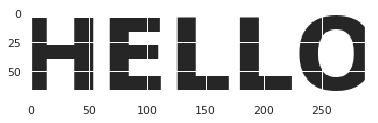

In [3]:
from matplotlib.image import imread
data1=imread("hello.png")
print(data1.shape)
print(data1[::-1,:,0].shape)
plt.imshow(data1)

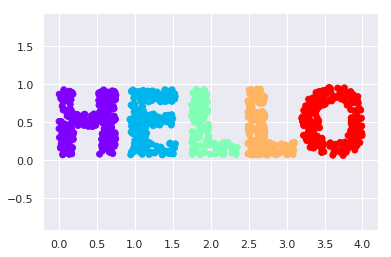

In [4]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

Quay chu hello

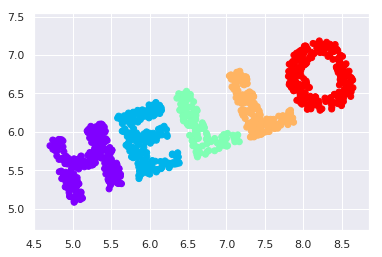

In [5]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
    [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

Tao ra ma tran khoang cach giua cac diem trong du lieu

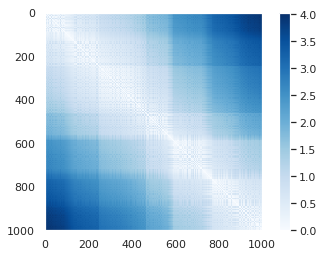

In [6]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

Test xem ma tran khoang cach giua cac diem cua X va X2 co giong nhau hay k

In [7]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

Khoi phuc lai ma tran toa do x,y tu ma tran khoang cach

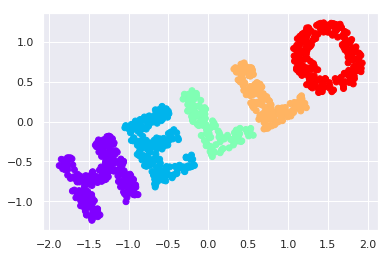

In [9]:
#dùng tham số dissimilarity='precomputed' để báo hàm biết rằng mình sẽ fit vào ma trận khoảng cách
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

# MDS as Manifold Learning

In [10]:
#chiếu vào không gian 3 chiều
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

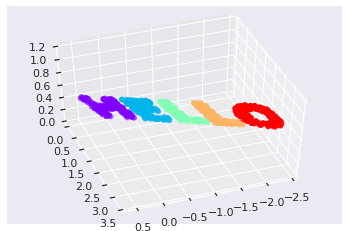

In [11]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
**colorize)
ax.view_init(azim=70, elev=50)

DÙng MDS để tính ma trận khoảng cách rồi xác định two-dimenstional embedding

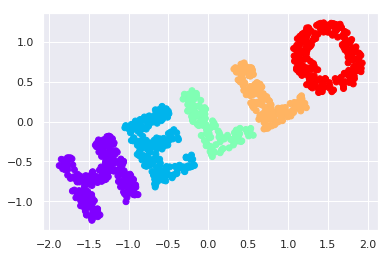

In [12]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

# Nonlinear Embeddings: Where MDS Fails

Dữ liệu từ nãy h ta chỉ tịnh tiến, quay, phóng to thu nhỏ
Bây h ta sẽ uốn dữ liệu cong(chữ hello bị cuộn tròn) xem thuật toán ở trên có vẽ lại đk nữa k nhé

In [13]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T
XS = make_hello_s_curve(X)
print(XS.shape)

(1000, 3)


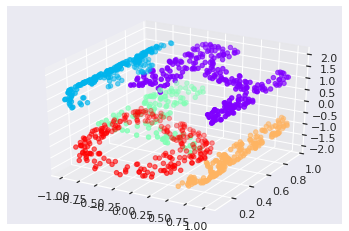

In [14]:
# versualize dữ liệu 3 chiều ở trên nhìn lại cho rõ
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
**colorize);

Dữ liệu bây h đã bị bẻ cong, hãy thử dungf thuật toán MDS áp dụng vào xem nó có vẽ lại được chữ hello không nhé

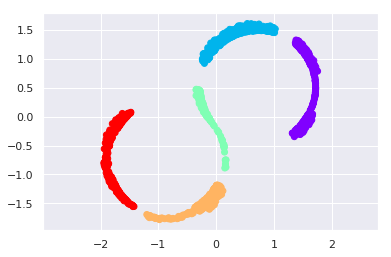

In [29]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

Thời hoàng kim của thuật toán MDS đã hết, nào xem thằng nào tiếp theo được sinh ra để giải quyế vấn đề này nhé

# Nonlinear Manifolds: Locally Linear Embedding

Khác với MDS là sẽ tính khoảng cách giữa các điểm ở gần và ở xa(khoảng cách giữa tất cả các điểm) để xây dựng lại tọa độ x,y. thuật toán này chỉ tính khoảng cách giữa các điểm gần nhau

Ta sẽ dùng thuật toán LLE để recover lại embedded two-dimenstional manifold

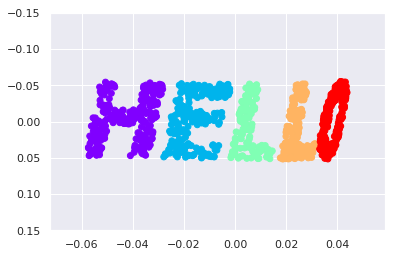

In [31]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
eigen_solver='dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

#  Isomap on Faces
Chuyên sử dụng cho dữ liệu high-dimensional

In [35]:
#tải ảnh về
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

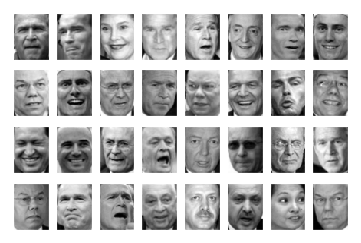

In [37]:
#visualize ảnh lên
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

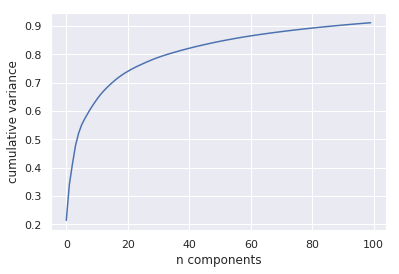

In [38]:
# tìm số chiều thích hợp để giảm dùng pca
from sklearn.decomposition import PCA as RandomizedPCA
model = RandomizedPCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [39]:
# tìm ma trận tọa độ x,y 
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

output là 1 ma trận 2 chiều của các điểm hình chiếu của các input image
Để nhìn rõ hơn thì ta sẽ visualize ảnh và vị trí của nó trên mp tọa độ x,y

In [43]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(images[i], cmap=cmap),
            proj[i])
            ax.add_artist(imagebox)

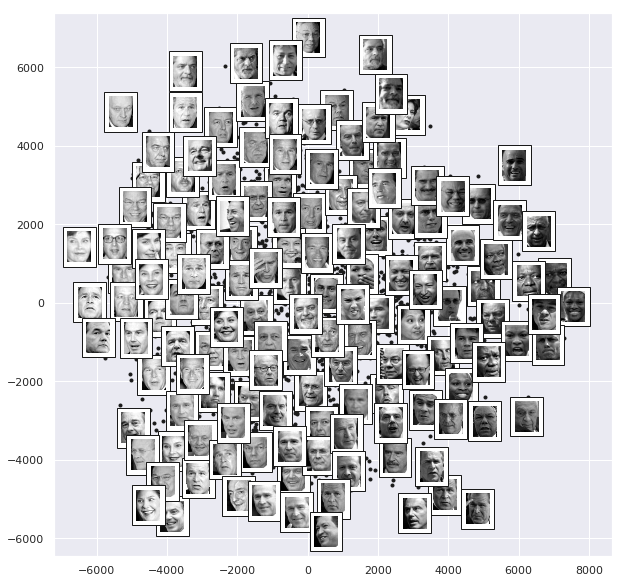

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
model=Isomap(n_components=2),
images=faces.images[:, ::2, ::2])